In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

#### Helper Functions

In [169]:

def obtain_stockinfo(tick, start = '2020-05-01', end = '2022-06-01'):
    """Obtains the stock data for a given time frame"""
    
    stock_info = yf.Ticker(tick)
    hist_data = stock_info.history(start = start, end = end, interval = '1d')
    
    return hist_data
    

    
def plot_stock_data(df, ticker, purchase=None, sell=None): 
    """Plots the stock data from the given time frame"""
    
    # Obtain the close values
    df_close = df.loc[:, 'Close']
    # Obtain the dates 
    df.index = pd.to_datetime(df.index)
    df_dates = df.index
    
    
    purchase = [datetime.strptime(new_date, '%Y-%m-%d').date() for new_date in purchase]
    
    if purchase:
        purchase_values = df.loc[(df.index.isin(purchase))]['Close'].tolist()
    
    sell = [datetime.strptime(new_date, '%Y-%m-%d').date() for new_date in sell]
    
    #Obtain sell values
    if sell:
        sell_values = df.loc[(df.index.isin(sell))]['Close'].tolist()
    
    # Plot the financial chart 
    fig, ax = plt.subplots(figsize=(12,8))
    
    # Plot of close history
    ax.plot(df_dates, df_close, color = 'blue', label = 'Daily Close Price')
    
    # Plot the purchase points
    if purchase:
        ax.scatter(purchase, purchase_values, color = 'red', s=100, label = 'outlier buy price')
        print(purchase_values)
    
    # Plot for sell points
    if sell:
        ax.scatter(sell, sell_values, color = 'red', marker = 'x', label = 'sell price')
        print(sell_values)
    
    
    if purchase:
    # Create annotations for the buy values
        for i, txt in enumerate(purchase_values):
            ax.annotate(f'outlier buy: {txt:.2f}', (mdates.date2num(purchase[i]), purchase_values[i]), 
                        xytext=(20,0), textcoords='offset pixels')
        
    
    if sell:
        # Create annotatons for sell values
        for j, txt2 in enumerate(sell_values):
            ax.annotate(f'sell: {txt2:.4f}', (mdates.date2num(sell[j]), sell_values[j]), 
                        xytext=(20,0), textcoords='offset pixels')
    
    
    ax.set_xlabel('Date', fontsize = 16)
    ax.set_ylabel('Close', fontsize = 16)
    plt.title(f'Ticker: {ticker}', fontsize = 16)
    plt.legend(loc='upper left')
    plt.show()
    
    return
    
    

#### Obtain the stock data from Yahoo finance

In [170]:
ticker = 'GGSM'

stock_df = obtain_stockinfo(ticker)
stock_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-01,0.00250,0.00250,0.00210,0.0024,5705413,0,0
2020-05-04,0.00250,0.00250,0.00200,0.0023,7394114,0,0
2020-05-05,0.00245,0.00245,0.00218,0.0024,4190141,0,0
2020-05-06,0.00230,0.00230,0.00210,0.0023,3476202,0,0
2020-05-07,0.00235,0.00235,0.00150,0.0020,16458456,0,0
...,...,...,...,...,...,...,...
2022-05-24,0.00200,0.00200,0.00160,0.0017,7927990,0,0
2022-05-25,0.00170,0.00180,0.00160,0.0017,4990657,0,0
2022-05-26,0.00180,0.00220,0.00170,0.0017,26386478,0,0


#### Plot the stock data for the given time frame

[0.0024999999441206455]


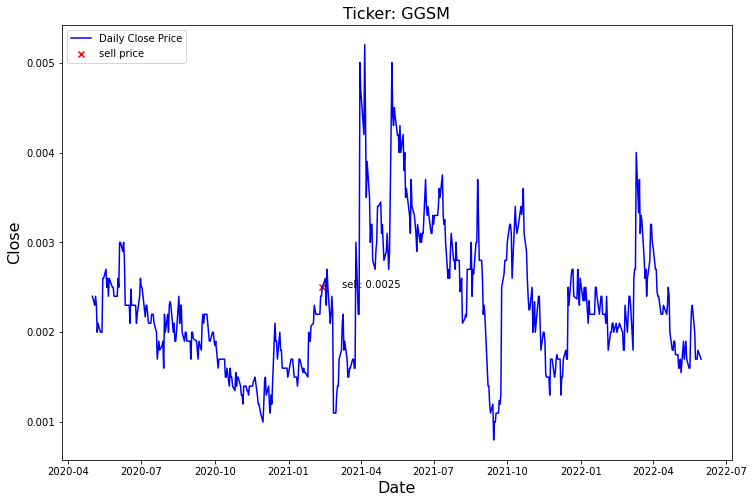

In [171]:
# Add the purchases dates and sell dates via lists
purchase_dates = [] 
sale_dates = ['2021-02-12']

plot_stock_data(stock_df, ticker, purchase_dates, sale_dates)